# speaker normalization

In [1]:
#read all pitch files by the same speaker in the procd_pitch directory, then create a list that
#append all pitch values from each file and compute mean and sd. Then, normalize each pitch file
#write to normed files. However, when doing SAX, is this step necessary? I think so, because 
#SAX cannot perform per speaker normalization. 

### get all speakers

In [11]:
from os import listdir
%matplotlib inline
train_path='MacAir-orig-data/cmn_phonetic_segmentation_tone/data/test/'
def get_all_speaker(train_path):
    
    onlyfiles = [ f for f in listdir(train_path) if f.endswith(".flac")]
    all_speaker=set()
    for file_sound in onlyfiles:
        speaker=file_sound[:3]
        if speaker not in all_speaker:
            all_speaker.add(speaker)
    return all_speaker
all_speaker=get_all_speaker(train_path)

In [13]:
all_speaker

{'CHJ', 'CHX', 'DIL', 'SHH', 'XIY', 'XUL'}

### do normalization

In [50]:
def get_vec_noext(file):
    time=[]
    pitch=[]
    f=open(file,'r').read().split('\n')
    #print 'line number:',len(f)
    for line in f[1:]:
        if line!='':
            l=line.split('\t')
            if float(l[1])!=1000:
                time.append(l[0])
                pitch.append(l[1])
    return time,pitch

In [51]:
#normalize for one speaker
import numpy as np
def get_speaker_mean(speaker,path):
    """path contains all pitch files, and we'll pick out files for this speaker to normalize"""
    onlyfiles = [ f for f in listdir(path) if f.startswith(speaker) and f.endswith('.tab')]
    all_pitch=[]
    for file_pitch in onlyfiles:
        time,pitch=get_vec_noext(path+file_pitch)
        pitch_float=[float(i) for i in pitch]
        all_pitch.extend(pitch_float[:])
    return np.mean(all_pitch)
        

In [29]:
speaker='DOH'
pitch_path='procd_pitch_test/'
onlyfiles = [ f for f in listdir(pitch_path) if f.endswith('.tab')]
print onlyfiles


['DOH001372_proc.tab', 'DOH001374_proc.tab', 'DOH001375_proc.tab', 'FAJ000028_proc.tab', 'FAJ000029_proc.tab', 'FAJ000749_proc.tab', 'HAT000104_proc.tab', 'XUL001066_proc.tab']


In [59]:
spk_mean=get_speaker_mean(speaker,pitch_path)

In [56]:
file_pitch='DOH001372_proc.tab'
time,pitch=get_vec_noext(pitch_path+file_pitch)

In [62]:
pitch_fl=[float(i) for i in pitch]
pitch=np.array(pitch_fl)

In [66]:
pitch

array([ 130.65388057,  130.64197451,  130.62673502, ...,   96.92307096,
         96.87023858,   96.81473478])

In [63]:
norm_pitch=pitch/spk_mean

In [64]:
norm_pitch

array([ 0.97162803,  0.97153949,  0.97142616, ...,  0.72078358,
        0.72039069,  0.71997792])

In [67]:
log_pitch=np.log(norm_pitch)

In [68]:
log_pitch

array([-0.02878224, -0.02887337, -0.02899002, ..., -0.32741635,
       -0.32796159, -0.32853473])

In [69]:
log_pitch.shape

(3326,)

In [77]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 

In [96]:
a=np.linspace(1,100,100)

In [105]:
b=running_mean(a,10)

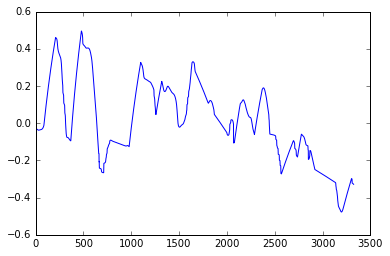

In [72]:
import matplotlib.pyplot as plt

plt.plot(log_pitch)

3326 3277


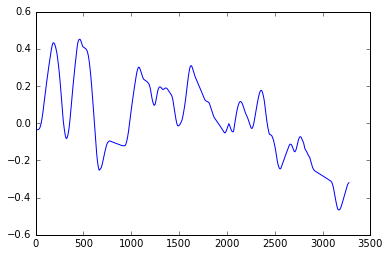

In [107]:
rm=running_mean(log_pitch,50)
plt.plot(rm)
print len(log_pitch),len(rm)

In [87]:
from plot_spectro import *

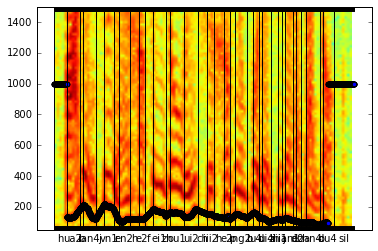

In [89]:
audio_file='MacAir-orig-data/cmn_phonetic_segmentation_tone/data/train/DOH001372.wav'
pitch_tab_file='procd_pitch/DOH001372_proc.tab'
phons_file='MacAir-orig-data/cmn_phonetic_segmentation_tone/data/train/DOH001372.phons'
do_plot(audio_file,pitch_tab_file,phons_file)

In [90]:
len(log_pitch)

3326

In [91]:
len(rm)

3227

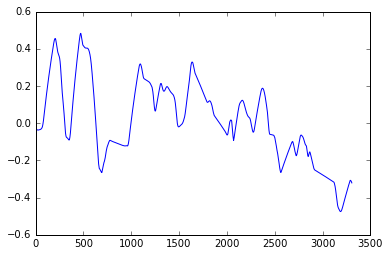

In [108]:
%timeit

CPU times: user 27 s, sys: 171 ms, total: 27.2 s
Wall time: 27.3 s


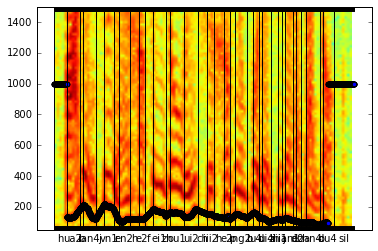

In [110]:
audio_file='MacAir-orig-data/cmn_phonetic_segmentation_tone/data/train/DOH001372.wav'
pitch_tab_file='procd_pitch/DOH001372_proc.tab'
phons_file='MacAir-orig-data/cmn_phonetic_segmentation_tone/data/train/DOH001372.phons'
%time do_plot(audio_file,pitch_tab_file,phons_file)